In [0]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from skimage.transform import resize
import cv2, skimage

import matplotlib.pyplot as plt
import os


In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/RWTHFingerSpelling.zip" .

In [0]:
#!echo 'A' | unzip -q asl-alphabet.zip 
!unzip -q RWTHFingerSpelling.zip 

In [0]:
imageWidth = 320
imageHeight = 240
imageSize = 64
labels = [i for i in range(1, 36) if i not in [10, 26, 27, 28, 29]]

30

In [0]:
def prepare_train_validation():
  folder = "train/"
  X = []
  y = []
  for label in labels:
      folderName = str(label)
      for imageFileName in os.listdir(folder + folderName):
        imgFile = cv2.imread(folder + folderName + '/' + imageFileName)
        imgFile = cv2.cvtColor(imgFile, cv2.COLOR_BGR2RGB)
        imgFile = skimage.transform.resize(imgFile, (imageSize, imageSize, 3))
        imgArr = np.asarray(imgFile).reshape((-1, imageSize, imageSize, 3))
        attributes = imageFileName.split("_")
        person = attributes[0]
        session = attributes[2]
        camera = attributes[3]
        X.append(imgArr)
        y.append((label, person, session, camera))

  return np.array(X, dtype=np.float32),np.array(y)                 

In [0]:
def prepare_test():
  folder = "test/"
  totalImage = 20*11*2*30
  X = []
  y = []
  for folderName in os.listdir(folder):
    if not folderName.startswith('.'):
      label = folderName
      for imageFileName in os.listdir(folder + folderName):
        imgFile = cv2.imread(folder + folderName + '/' + imageFileName)
        imgFile = cv2.cvtColor(imgFile, cv2.COLOR_BGR2RGB)
        if imgFile is not None:
          imgFile = skimage.transform.resize(imgFile, (imageSize, imageSize, 3))
          imgArr = np.asarray(imgFile).reshape((-1, imageSize, imageSize, 3))
          attributes = imageFileName.split("_")
          person = attributes[0]
          session = attributes[2]
          camera = attributes[3]
          X.append(imgArr)
          y.append((label, person, session, camera))
  return np.array(X, dtype=np.float32),np.array(y)                  

In [0]:
trainX, trainY = prepare_train_validation()


In [0]:
np.save('/content/drive/My Drive/datasetRWTH/trainFeatures',trainX)
np.save('/content/drive/My Drive/datasetRWTH/trainLabels',trainY)

In [0]:
testX, testY = prepare_test()
testY

[('4', '17', '2', 'cam2'),
 ('4', '5', '2', 'cam1'),
 ('4', '12', '2', 'cam2'),
 ('4', '7', '2', 'cam2'),
 ('4', '19', '2', 'cam2'),
 ('4', '12', '2', 'cam1'),
 ('4', '6', '2', 'cam2'),
 ('4', '15', '2', 'cam2'),
 ('4', '13', '2', 'cam2'),
 ('4', '6', '2', 'cam2'),
 ('4', '8', '2', 'cam1'),
 ('4', '11', '2', 'cam2'),
 ('4', '6', '2', 'cam1'),
 ('4', '7', '2', 'cam2'),
 ('4', '9', '2', 'cam2'),
 ('4', '11', '2', 'cam1'),
 ('4', '19', '2', 'cam1'),
 ('4', '7', '2', 'cam1'),
 ('4', '11', '2', 'cam2'),
 ('4', '15', '2', 'cam2'),
 ('4', '19', '2', 'cam1'),
 ('4', '9', '2', 'cam1'),
 ('4', '2', '2', 'cam2'),
 ('4', '2', '2', 'cam1'),
 ('4', '18', '2', 'cam1'),
 ('4', '19', '2', 'cam1'),
 ('4', '4', '2', 'cam1'),
 ('4', '14', '2', 'cam1'),
 ('4', '13', '2', 'cam2'),
 ('4', '19', '2', 'cam1'),
 ('4', '8', '2', 'cam1'),
 ('4', '8', '2', 'cam2'),
 ('4', '2', '2', 'cam2'),
 ('4', '5', '2', 'cam2'),
 ('4', '5', '2', 'cam2'),
 ('4', '2', '2', 'cam1'),
 ('4', '10', '2', 'cam1'),
 ('4', '16', '2', 'c

In [0]:
np.save('/content/drive/My Drive/datasetRWTH/testFeatures',testX)
np.save('/content/drive/My Drive/datasetRWTH/testLabels',testY)

In [0]:
imgFile = cv2.imread("test/4/5_4_2_cam2_00000033.jpg")
imgFile = cv2.cvtColor(imgFile, cv2.COLOR_BGR2RGB)
imgFile = skimage.transform.resize(imgFile, (imageSize, imageSize, 3))

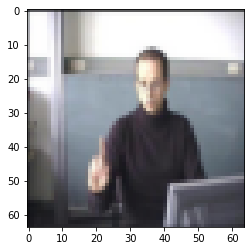

In [0]:
plt.imshow(testX[0].reshape(64,64,3))

In [0]:
imgArr = np.asarray(imgFile).reshape((-1, imageSize, imageSize, 3))
imgArr

array([[[[0.18333333, 0.19558824, 0.25882353],
         [0.33431373, 0.33823529, 0.36078431],
         [0.18112745, 0.17916667, 0.24754902],
         ...,
         [0.35196078, 0.34191176, 0.38235294],
         [0.34509804, 0.3372549 , 0.37843137],
         [0.34117647, 0.33112745, 0.38137255]],

        [[0.40588235, 0.4379902 , 0.56151961],
         [0.87426471, 0.88627451, 0.92647059],
         [0.40245098, 0.41740196, 0.54681373],
         ...,
         [0.91470588, 0.89901961, 0.97647059],
         [0.88921569, 0.86960784, 0.97647059],
         [0.86666667, 0.84411765, 0.97254902]],

        [[0.43063725, 0.47279412, 0.56691176],
         [0.89828431, 0.91078431, 0.92181373],
         [0.42965686, 0.45318627, 0.57377451],
         ...,
         [0.94509804, 0.93651961, 0.98431373],
         [0.92352941, 0.91004902, 0.98823529],
         [0.89803922, 0.87916667, 0.98823529]],

        ...,

        [[0.25759804, 0.28995098, 0.48014706],
         [0.33823529, 0.38137255, 0.60490196]

In [0]:
imgFile1.shape

(288, 352, 3)

In [0]:
!du -hs '/content/drive/My Drive/datasetRWTH/'

12G	/content/drive/My Drive/datasetRWTH/
